# Quantum Cloud, Near-Time Compute, and Qiskit Primitive
<br>
<br>

This Notebook is the product of Edoardo Zappia's modification of the  Notebook you can find here:

https://github.com/grossiM/LAB_Quantum_Computation23/tree/main

The original Notebook was written by: michele.grossi@cern.ch

## Introduction to Qiskit

Qiskit is a Python-based, open source software development toolkit (SDK) for working with quantum computers.  It can be used at the level of circuits, algorithms, and application modules.

### Installing Qiskit

Anaconda or a pyenv is recommended to manage all dependencies.
The file environment.yml contains the required libraries and can be installed in this way:

*Command:* `conda env create -f environment. yml`


### Typical Qiskit Workflow

**Build**: Design a quantum circuit(s) that represents the problem you are considering.

**Compile**: Compile circuits for a specific quantum backend, e.g., a quantum system or classical simulator.

**Run**: Run the compiled circuits on the specified quantum backend.

**Analyze**: Compute summary statistics and visualize the results of the experiments.


### Step 0 : check package version

In [2]:
#!pip install qiskit

In [4]:
#import qiskit.tools.jupyter
#%qiskit_version_table
#%qiskit_copyright

In [133]:
#pip install qcircuit

In [134]:
#pip install pdflatex

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
import numpy as np
import qiskit.quantum_info as qi
import qiskit
from qiskit import Aer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.visualization.circuit import *
from qiskit import transpile, assemble
import matplotlib.pyplot as plt
from qiskit.circuit import Parameter

In [3]:
# Supress warnings
import warnings
warnings.filterwarnings("ignore")

## 1. Create superposition of states


*Superposition* is the fundamental concept to describe the ability of a quantum system to exist in multiple states, that distinguishes it from the classical system.
We build a quantum circuit to generate an equiprobable superposition of $|0\rangle$ and $|1\rangle$ using a *Hadamard gate* $H$ :
$$
H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = |+\rangle
$$
$$
H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = |-\rangle
$$

#### Build Quantum Circuits

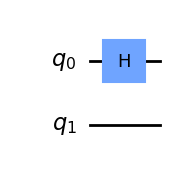

In [4]:
# Create a quantum circuit instance with one qubit
circuit = QuantumCircuit(2,0)

# Apply Hadamard Gate
circuit.h(0)

# Draw quantum circuit
circuit.draw(output = "mpl")

#### Simulate quantum circuit with statevector simulator

A `backend` refers to the device or simulator on which a quantum circuit is executed or simulated to obtain results. In Qiskit, we have a list of theoretical simulators that are avilable in open-source.

In [6]:
# Print all the available quantum simulators
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

Let us start from simulating the quantum circuit with Qiskit `statevector_simulator`, the most common backend to simulate an ideal quantum circuit. It returns the quantum state in a vector form.

In [7]:
# Load statevector simulator
simulator = Aer.get_backend("statevector_simulator")

In [9]:
# Create quatum job to execute
job = simulator.run(circuit)

# Execute the job
result = job.result()

state_ex=result.get_statevector(circuit) #if possible mantains phases as fractions
state = result.get_statevector(circuit, decimals = 4) #using parameter decimals, approximates the fractions

In [10]:
state_ex.draw(output='latex')

<IPython.core.display.Latex object>

In [11]:
state.draw(output='latex')

<IPython.core.display.Latex object>

### Visualization of the quantum state as a bloch sphere
Now, let's display the quantum state on the *Bloch Sphere*.

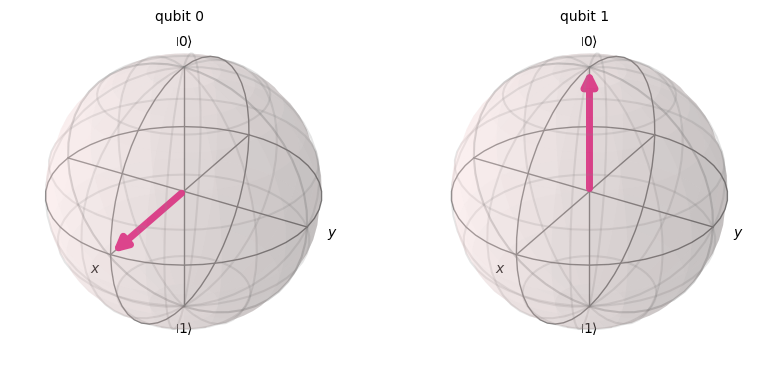

In [12]:
state.draw(output = "bloch")

### Test different one qubit gates
You can test different single quantum gates using `statevector_simulator` and visualize how they act on the bloch sphere.

In [13]:
#to do statevector simulation more easily
def statevect_sim(circuit: QuantumCircuit):
    simulator=Aer.get_backend("statevector_simulator")
    state=simulator.run(circuit).result().get_statevector(circuit)    
    print(state)

    return state.draw('latex')

In [14]:
# Apply RX / RY / S /T gates
circuit2=QuantumCircuit(1,0)
circuit2.rx(np.pi/2,0) #rx(theta, n) gate is a single-qubit gate rotation of angle theta around the x-axis of the qubit n
circuit2.draw(output='mpl') 

statevect_sim(circuit2)

Statevector([0.70710678+0.j        , 0.        -0.70710678j],
            dims=(2,))


<IPython.core.display.Latex object>

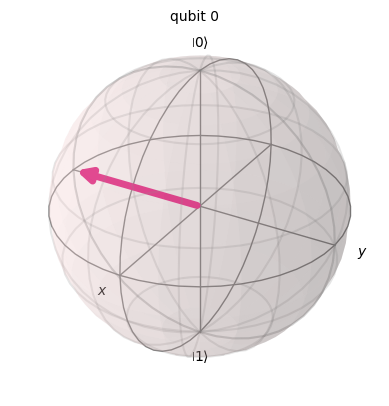

In [15]:
simulator.run(circuit2).result().get_statevector(circuit2).draw(output = "bloch")

In [16]:
circuit3=QuantumCircuit(1,0)
circuit3.ry(np.pi*3/2,0) #ry(theta, n) gate is a single-qubit gate rotation of angle theta around the y-axis of the qubit n
circuit3.draw(output='mpl')

#create the job
job3=simulator.run(circuit3)
#execute the job
result3=job3.result()
#create the state
state3_ex=result3.get_statevector(circuit3)
state3=result3.get_statevector(circuit3,decimals=4)


In [17]:
state3_ex.draw(output='latex')

<IPython.core.display.Latex object>

In [18]:
state3.draw(output='latex')

<IPython.core.display.Latex object>

In [19]:
#or we can just use
statevect_sim(circuit3)

Statevector([-0.70710678+0.j,  0.70710678+0.j],
            dims=(2,))


<IPython.core.display.Latex object>

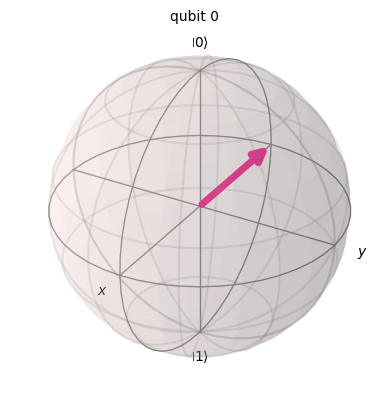

In [20]:
state3.draw(output='bloch')

In [21]:
circuit4=QuantumCircuit(1,0)
circuit4.rx(np.pi/4,0)
circuit4.s(0) #s(n) gate is a single-qubit gate rotation of angle pi/2 around the z-axis of the qubit n
circuit4.draw(output='mpl')

statevect_sim(circuit4)

Statevector([0.92387953+0.j, 0.38268343+0.j],
            dims=(2,))


<IPython.core.display.Latex object>

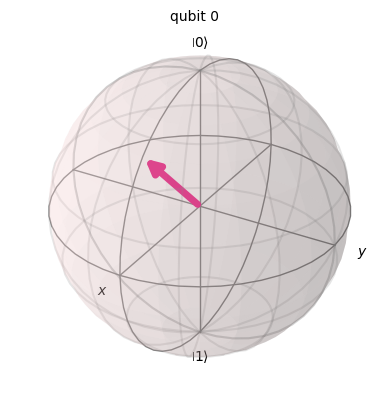

In [22]:
simulator.run(circuit4).result().get_statevector(circuit4).draw(output = "bloch")

In [23]:
circuit5=QuantumCircuit(1,0)
circuit5.h(0) #the state is in |+>
circuit5.t(0) #t(n) gate is a single-qubit gate rotation of angle pi/4 around the z-axis of the qubit n
circuit5.draw(output='mpl')

statevect_sim(circuit5)

Statevector([0.70710678+0.j , 0.5       +0.5j],
            dims=(2,))


<IPython.core.display.Latex object>

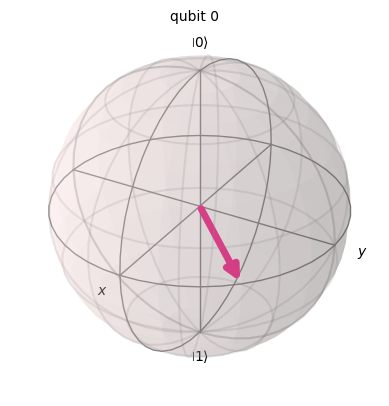

In [24]:
simulator.run(circuit5).result().get_statevector(circuit5).draw(output = "bloch")

## 2. Create Bell state

A *Bell state*, also known as an *EPR pair* (Einstein-Podolsky-Rosen pair), is a specific two-qubit state which is maximally entangled. Entanglement is another important phenomenon, which characterizes a quantum system, where the quantum states of two or more particles become correlated in such a way that the state of one particle cannot be described independently of the other, regardless of the distance between them.

On the quantum circuit, Bell state can be created by applying a set of quantum states to the initial state $|00\rangle$ :

$$
\begin{align}
& \text{Initial State} = |00\rangle \nonumber \\ \to & H_0|00\rangle  = \frac{1}{\sqrt{2}} (|00\rangle + |10\rangle) \nonumber \\
\to & CNOT_{01}  \frac{1}{\sqrt{2}} (|00\rangle + |10\rangle) = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)
\end{align}$$  

In [25]:
# Create quantum circuit with two quantum registers and two classical registers
circuit_bell = QuantumCircuit(2, 2)

# Create Bell state following the expression above
circuit_bell.h(0)
circuit_bell.cx(0,1)

statevect_sim(circuit_bell)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

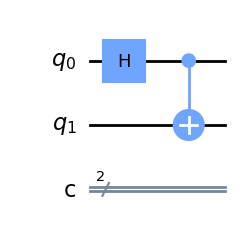

In [26]:
# Visualize the circuit
circuit_bell.draw(output = 'mpl')

Try to implement a circuit to obtain this state:
$$
\begin{align}
& \text{Initial State} = |000\rangle & \nonumber  &  \frac{1}{\sqrt{2}} (|000\rangle - |111\rangle)
\end{align}$$  

In [27]:
circuit=QuantumCircuit(3)
circuit.x(0)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)

In [28]:
statevect_sim(circuit)

Statevector([ 0.70710678-8.65956056e-17j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j, -0.70710678+8.65956056e-17j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

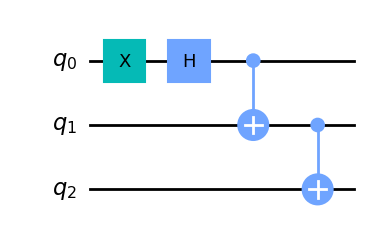

In [29]:
circuit.draw('mpl')

Try to implement a circuit to obtain this state:
$$
\begin{align}
& \text{Initial State} = |00\rangle & \nonumber  &  \frac{1}{\sqrt{2}} (|01\rangle - |10\rangle)
\end{align}$$  

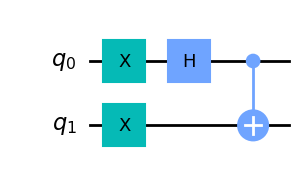

In [30]:
circuit=QuantumCircuit(2)
circuit.x(0)
circuit.h(0)
circuit.x(1)
circuit.cx(0,1)
circuit.draw('mpl')

In [31]:
circuit.swap(0,1) #qiskit visualization of qubits is reversed

In [32]:
statevect_sim(circuit)

Statevector([ 0.        +0.00000000e+00j,  0.70710678-8.65956056e-17j,
             -0.70710678+8.65956056e-17j,  0.        +0.00000000e+00j],
            dims=(2, 2))


<IPython.core.display.Latex object>

#### Visualization of the state
Multi-qubit states can be visualized with the methods other than the bloch sphere.  
- `plot_state_city` : Displays the quantum states as the real and imaginary parts of the state matrix.
- `plot_state_hinton` : Sampe as `plot_state_city`, but as a 2D colour plot.
- `plot_state_qsphere` : Display the quantum state as a vector on a spherical ball. The thickness of the arrow corresponds to the amplitude of the state, and its color to the phase.

In [33]:
#from qiskit.visualization import plot_state_city, plot_state_hinton, plot_state_qsphere, plot_histogram

In [34]:
state2=simulator.run(circuit2).result().get_statevector(circuit2)
state2.draw(output='latex')

<IPython.core.display.Latex object>

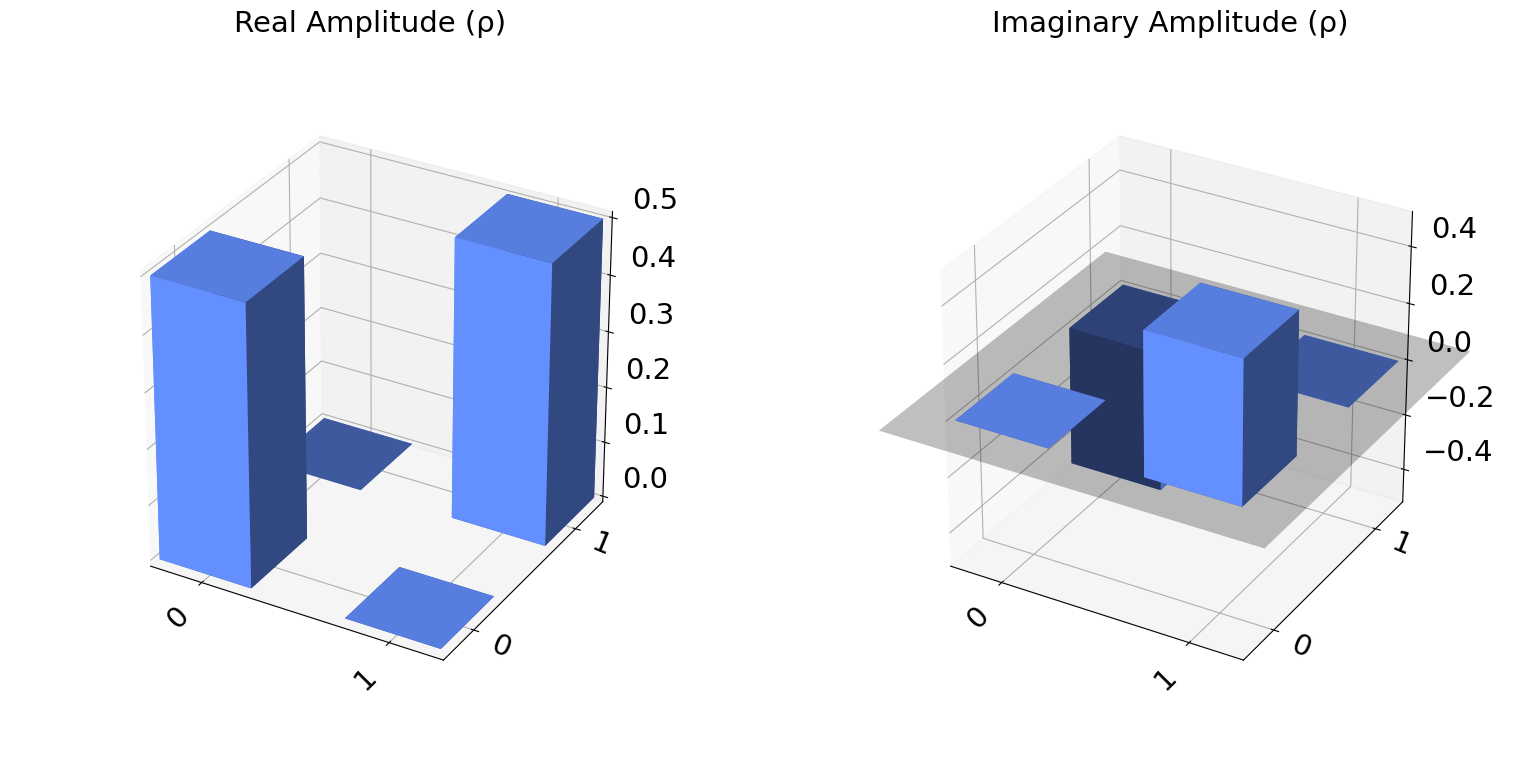

In [35]:
plot_state_city(state2) #Plot two 3d bar graphs (two dimensional) of the real and imaginary part of the density matrix rho

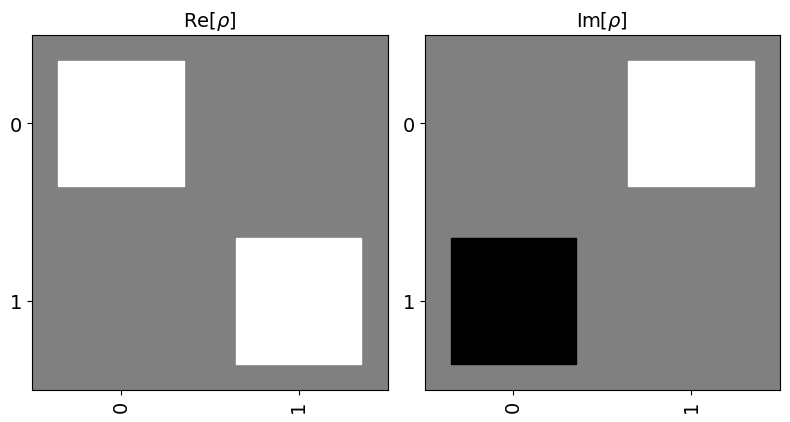

In [36]:
plot_state_hinton(state2)

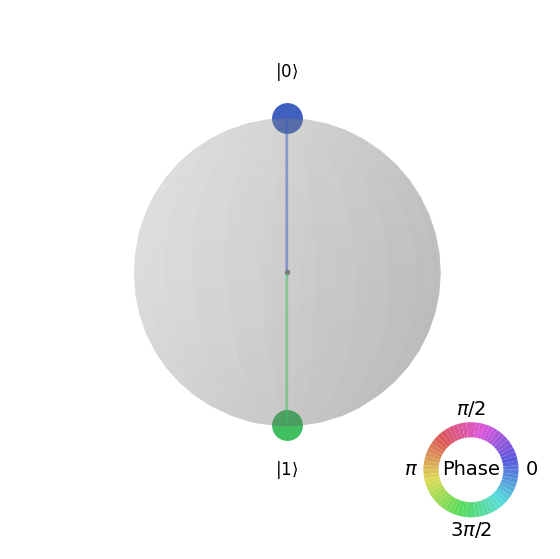

In [37]:
#seaborn package required
plot_state_qsphere(state2)

In [38]:
state=simulator.run(circuit).result().get_statevector(circuit)
state.draw('latex')

<IPython.core.display.Latex object>

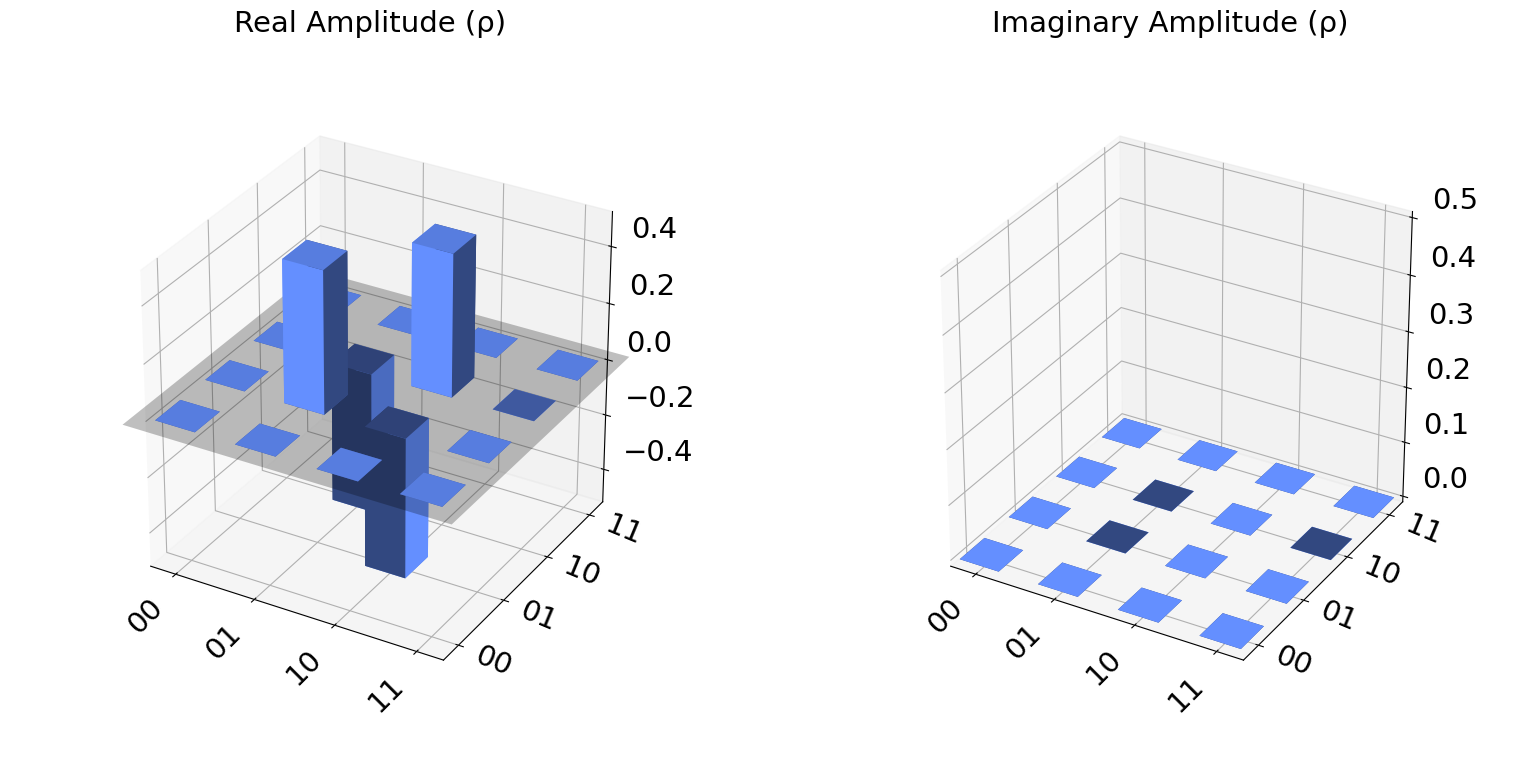

In [39]:
plot_state_city(state)

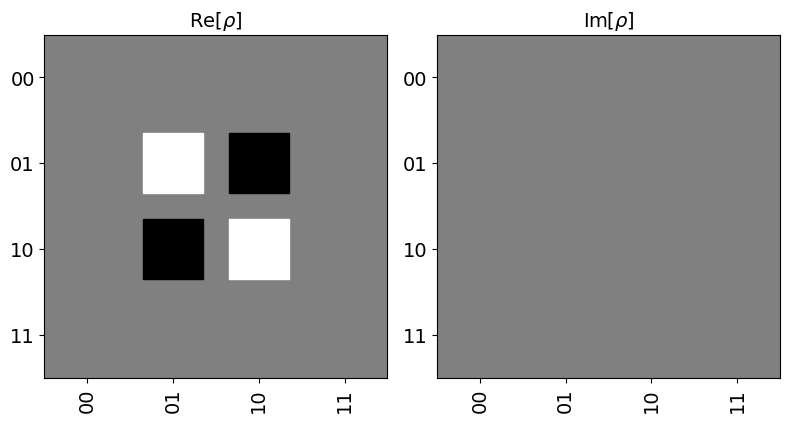

In [40]:
plot_state_hinton(state)

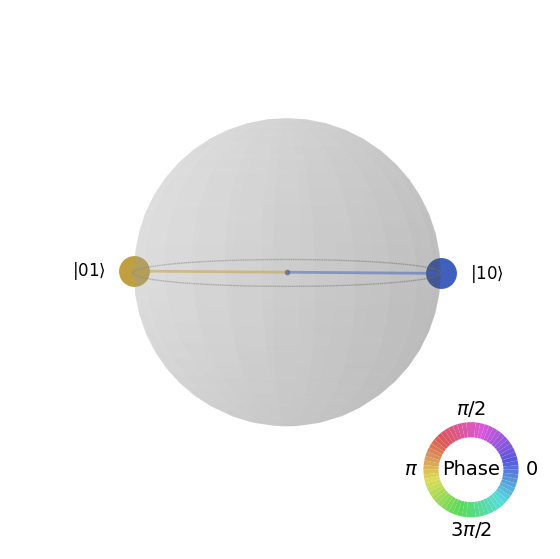

In [41]:
plot_state_qsphere(state)

In [42]:
state_bell=simulator.run(circuit_bell).result().get_statevector(circuit_bell)
state_bell.draw('latex')

<IPython.core.display.Latex object>

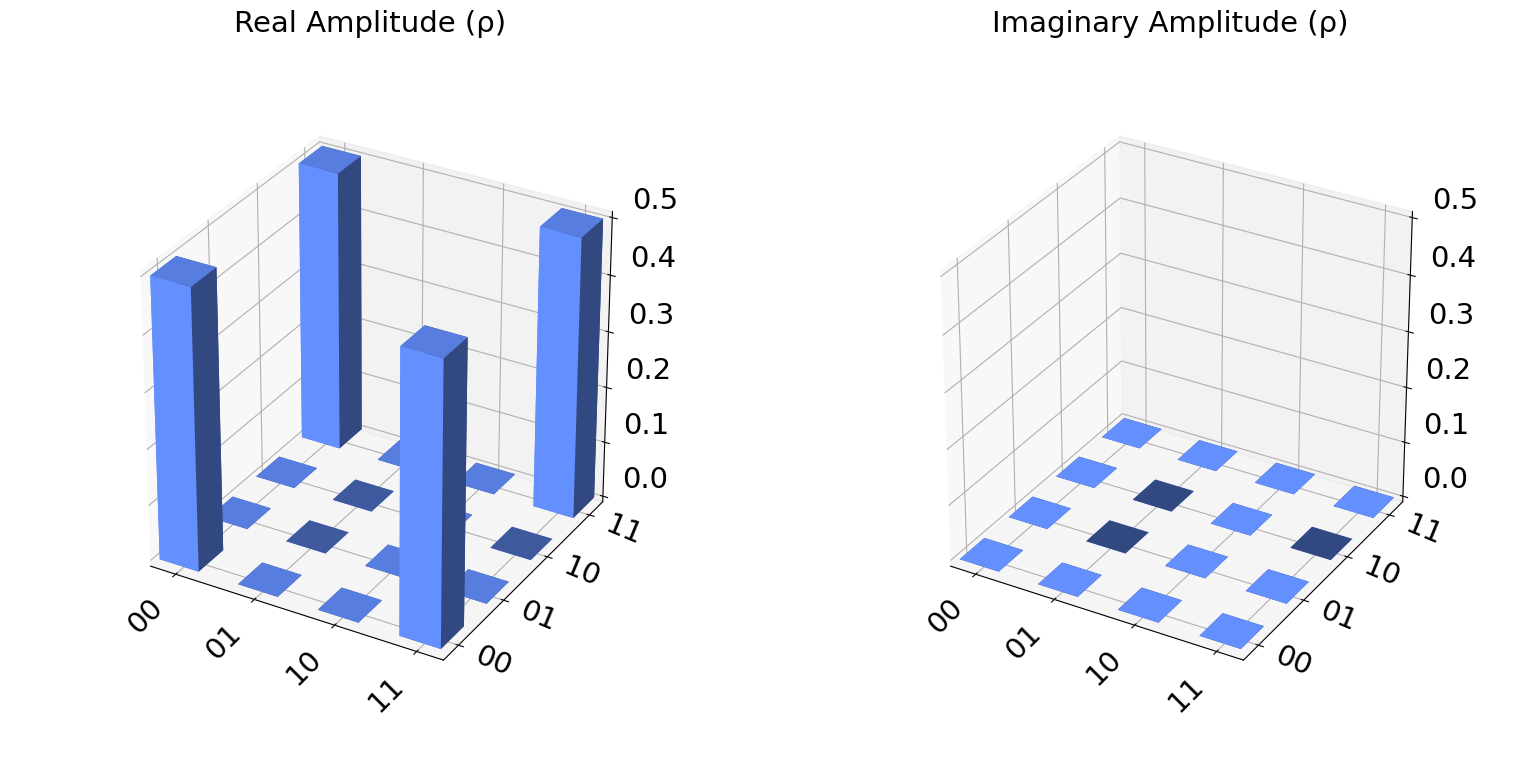

In [43]:
plot_state_city(state_bell)

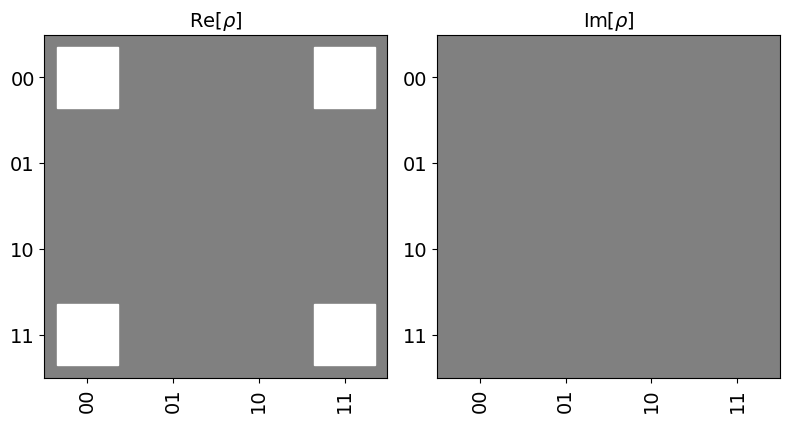

In [44]:
plot_state_hinton(state_bell)

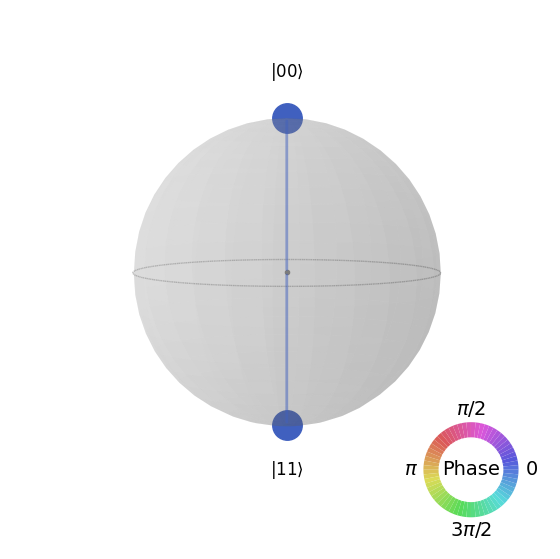

In [45]:
plot_state_qsphere(state_bell)

#### Simulate with Unitary simulator

In [46]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator') #Unitary Simulator is a simulator provided by Qiskit that calculates and returns the unitary matrix that represents the Quantum Circuit

In [47]:
# Create job and execute
job = backend.run(circuit_bell)
result = job.result()

# Show the results
print(result.get_unitary(circuit_bell, decimals=3))


Operator([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


#### Simulate with Qasm simulator

Until now on, we simulated the quantum circuit. However in reality, we do not have direct access to the quantum state. Instead, each qubit should be *measured* at the end of the quantum circuit in specific basis (generally in the computational basis $|0\rangle, |1\rangle$). As soon as the quantum system is measured, the state $|\psi\rangle$ *collapses* to the measurement basis $|b\rangle$ with a probability :
$$
P(b) == |\langle b | \psi \rangle |^2.
$$
Unlike the previous steps where the quantum circuit only required `QuantumRegister` to be simulated, we need to add `ClassicalRegister` to measure the quantum circuit.

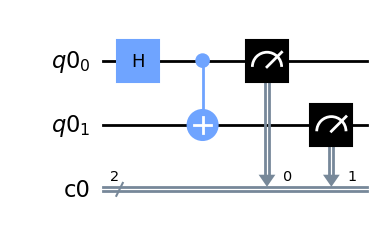

In [48]:
# Initialize quantum and classical registers
qr = QuantumRegister(2)
cr = ClassicalRegister(2) #classical registers are needed to store the results of measurements (if we use the command measure(qr,cr))

# Build quantum circuit
circuit_qasm = QuantumCircuit(qr, cr)

#Create Bell state
circuit_qasm.h(0)
circuit_qasm.cx(0,1)

# Measure qubits
circuit_qasm.measure(qr, cr) #circuit_qasm.measure_all() memeasures all qubits, creates a new register to store the measurements and adds a barrier before the measurements

circuit_qasm.draw(output = 'mpl')

In [49]:
backend = Aer.get_backend("qasm_simulator")
shots = 1024 #1024 is the standard number of shots
job = execute(circuit_qasm, backend, shots = shots)
result = job.result()

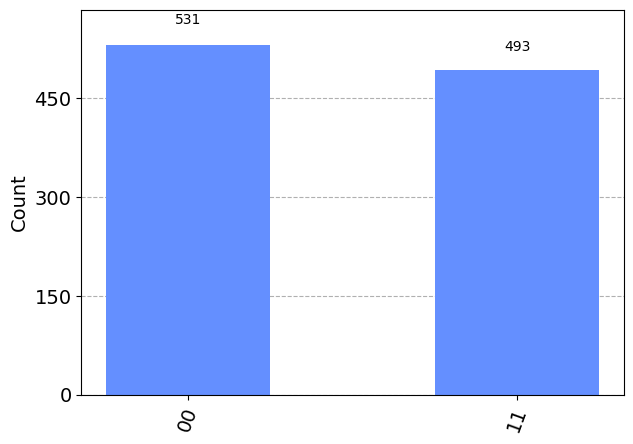

In [50]:
counts = result.get_counts()
plot_histogram(counts)

In [51]:
qr=QuantumRegister(2)
cr=ClassicalRegister(2)
circ_bell=QuantumCircuit(qr,cr)
circ_bell.x(0)
circ_bell.h(0)
circ_bell.cx(0,1)

circ_bell.measure(qr,cr)

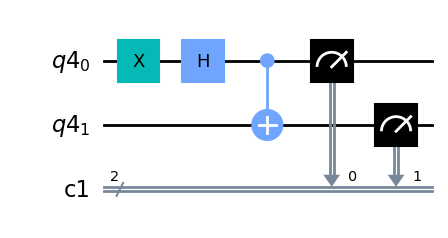

In [52]:
circ_bell.draw('mpl')

In [53]:
job_bell=execute(circ_bell,backend,shots=1024)
result_bell=job_bell.result()

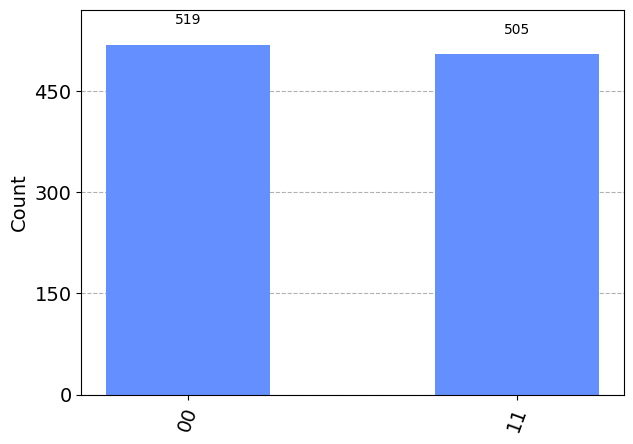

In [54]:
counts_bell=result_bell.get_counts()
plot_histogram(counts_bell)

$\frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$ and $\frac{1}{\sqrt{2}} (|00\rangle - |11\rangle)$ differ only on local phase, in the second state there is a local phase of $\phi=\pi$ (coefficient: $e^{i\pi})$ but the probability is $P(b) == |\langle b | \psi \rangle |^2$ so this local phase doesn't affect it

**SOME INTERESTING FUNCTIONS:**

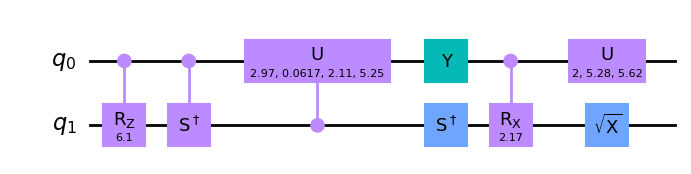

In [55]:
#Import the random circuit class
from qiskit.circuit.random import random_circuit
#Create two random circuits
qc1 = random_circuit(2,2) #2 qubits, 2 layers of gates (in this case one layer: two one-qubit gate or one two-qubits gate)
qc2 = random_circuit(2,4)
#Concatenate the two random circuits
qc = qc1.compose(qc2)
#Draw the circuit
qc.draw('mpl')

In [56]:
#Define function to print circuit properties:
def print_circuit_props(qc):
    width = qc.width() #number of gates in the layer with the most gates ("control" operation is counted as a gate (Ex. cx(0,1) width=2, one gate on qubit 0 and one on qubit 1), 
    #also the idenity (do nothing) in the layer with the most gates is counted as one gate, see the next example)
    depth = qc.depth() #number of layers in witch we can partition the circuit
    num_operators = qc.count_ops() #gives the list of operations with their number of applications
    circuit_size = qc.size() #number of gates of the circuit
    print('Width = ',width) 
    print('Depth = ', depth)
    print('Circuit size = ',circuit_size)
    print('Number of operators = ', num_operators)

In [57]:
#Pass our quantum circuit to print out the circuit properties
print_circuit_props(qc)

Width =  2
Depth =  6
Circuit size =  8
Number of operators =  OrderedDict([('crz', 1), ('csdg', 1), ('cu', 1), ('sdg', 1), ('y', 1), ('crx', 1), ('sx', 1), ('u', 1)])


Width =  3
Depth =  1
Circuit size =  1
Number of operators =  OrderedDict([('cx', 1)])


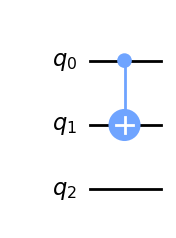

In [58]:
qc = QuantumCircuit(3)
qc.cx(0,1)
print_circuit_props(qc)
qc.draw('mpl')

Width =  3
Depth =  1
Circuit size =  1
Number of operators =  OrderedDict([('ccx', 1)])


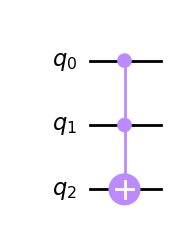

In [59]:
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
#Print out the circuit properties
print_circuit_props(qc)
qc.draw('mpl')

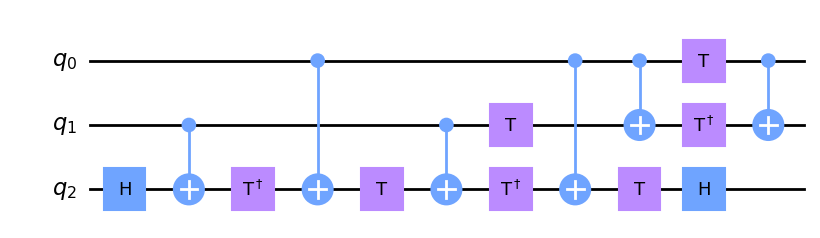

In [60]:
qc.decompose().draw('mpl')

In [61]:
#Print out the circuit properties
print_circuit_props(qc.decompose())

Width =  3
Depth =  11
Circuit size =  15
Number of operators =  OrderedDict([('cx', 6), ('t', 4), ('tdg', 3), ('h', 2)])


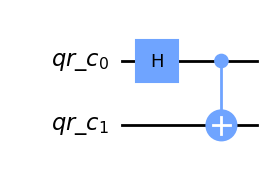

In [62]:
#Create a custom two-qubit composite gate
#Create the quantum register
qr = QuantumRegister(2, name='qr_c') #name parameter gives a name to qubits
#Generate quantum circuit which will make up the composite gate
comp_qc = QuantumCircuit(qr, name='my-composite') #my-composite is the name of the circuit 
#Add any gates you wish to your composite gate
comp_qc.h(0)
comp_qc.cx(0, 1)
#Create the composite instructions by converting the QuantumCircuit to a list of Instructions
composite_inst = comp_qc.to_instruction()
#Draw the circuit which will represent the composite gate
comp_qc.draw('mpl')

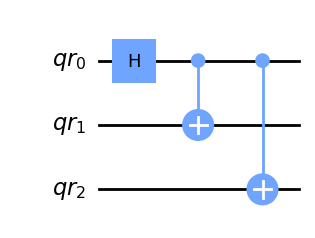

In [63]:
#Create another 3-qubit circuit 
qr2 = QuantumRegister(3, 'qr')
#Create a quantum circuit using the quantum register
qc = QuantumCircuit(qr2)
#Add any arbitrary gates that would represent the function of the composite gate 
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
#Draw the composite circuit
qc.draw('mpl')

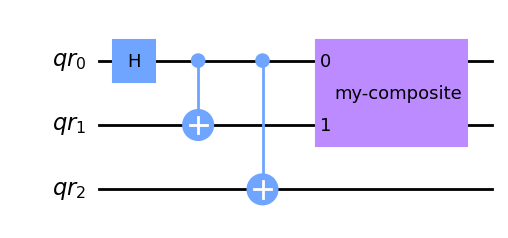

In [64]:
#Append your composite gate to the specified qubits. 
qc.append(composite_inst, [qr2[0], qr2[1]])
#Draw the complete circuit
qc.draw('mpl')

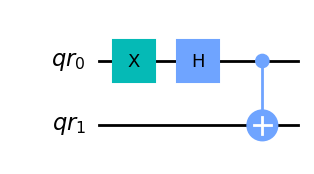

In [65]:
qr=QuantumRegister(2,'qr')
circ=QuantumCircuit(qr,name='bell_minus')
circ.x(0)
circ.h(0)
circ.cx(0,1)

bell_minus = circ.to_instruction() 
circ.draw('mpl')

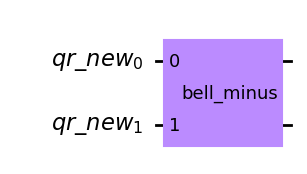

In [66]:
qr_new=QuantumRegister(2,'qr_new')
circ1=QuantumCircuit(qr_new)
circ1.append(bell_minus, [qr_new[0], qr_new[1]])
circ1.draw('mpl')

## Parameterized circuits

In [67]:
theta = Parameter('θ')

n = 5

qc = QuantumCircuit(5, 1)

qc.h(0)
for i in range(n-1):
    qc.cx(i, i+1)

qc.barrier()
qc.rz(theta, range(5)) #theta is the angle of rotation range(5) is a way to apply rz to qubits from 0 to 4
qc.barrier()

for i in reversed(range(n-1)):
    qc.cx(i, i+1)
qc.h(0)
qc.measure(0, 0)


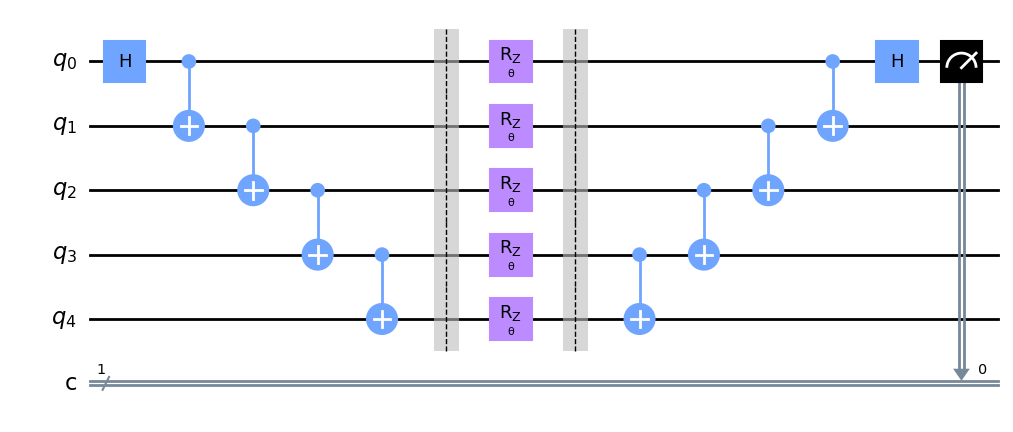

In [68]:
qc.draw('mpl')

$$RZ(\theta) = \begin{bmatrix} e^{-i\frac{\theta}{2}} & 0\\ 0 & e^{i\frac{\theta}{2}} \end{bmatrix}$$
$$RZ(\theta)\ket{0} = \begin{bmatrix} e^{-i\frac{\theta}{2}} & 0\\ 0 & e^{i\frac{\theta}{2}} \end{bmatrix}\begin{bmatrix}1\\0\end{bmatrix}=\begin{bmatrix}e^{-i\frac{\theta}{2}}\\0\end{bmatrix}=e^{-i\frac{\theta}{2}}\ket{0} $$
$$RZ(\theta)\ket{1} = \begin{bmatrix} e^{-i\frac{\theta}{2}} & 0\\ 0 & e^{i\frac{\theta}{2}} \end{bmatrix}\begin{bmatrix}0\\1\end{bmatrix}=\begin{bmatrix}0\\ e^{i\frac{\theta}{2}}\end{bmatrix}=e^{i\frac{\theta}{2}}\ket{1} $$

So the algorithm is:

$$ \ket{0}\ket{0000} \to  H_0 \to \frac{1}{\sqrt{2}}(\ket{0}+\ket{1})\ket{0000} \to CX_{01} \to \frac{1}{\sqrt{2}}(\ket{00000}+\ket{11000}) \to CX_{12}CX_{23}CX_{34} \to \frac{1}{\sqrt{2}}(\ket{00000}+\ket{11111}) $$
$$\to RZ(\theta)_0 \to \frac{1}{\sqrt{2}}(e^{-i\frac{\theta}{2}}\ket{0}\ket{0000}+e^{i\frac{\theta}{2}}\ket{1}\ket{1111}) \to RZ(\theta)_1RZ(\theta)_2RZ(\theta)_3RZ(\theta)_4 \to \frac{1}{\sqrt{2}}(e^{-i\frac{5}{2}\theta}\ket{00000}+e^{i\frac{5}{2}\theta}\ket{11111}) = $$
$$= \frac{1}{\sqrt{2}}e^{-i\frac{5}{2}\theta}(\ket{00000}+e^{i5\theta}\ket{11111}) \quad \textrm{$e^{-i\frac{5}{2}\theta}$ is a global phase so we can ignore it}$$
$$= \frac{1}{\sqrt{2}}(\ket{00000}+e^{i5\theta}\ket{11111}) $$
$$\to CX_{34}CX_{23}CX_{12}CX_{01} \to \frac{1}{\sqrt{2}}(\ket{00000}+e^{i5\theta}\ket{10000}) = \frac{1}{\sqrt{2}}(\ket{0}+e^{i5\theta}\ket{1})\ket{0000}$$
$$\to H_0 \to \frac{1}{\sqrt{2}}(\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})+\frac{1}{\sqrt{2}}e^{i5\theta}(\ket{0}-\ket{1}))\ket{0000} = \frac{1}{2}((1+e^{i5\theta})\ket{0}+(1-e^{i5\theta})\ket{1})\ket{0000}
 $$

### Binding parameters to values
All circuit parameters must be bound before sending the circuit to a backend. This can be done as follows:
- The `bind_parameters` method accepts a dictionary mapping `Parameter`s to values, and returns a new circuit with each parameter replaced by its corresponding value. Partial binding is supported, in which case the returned circuit will be parameterized by any `Parameter`s that were not mapped to a value.

In [69]:
theta_range = np.linspace(0, 2 * np.pi, 128) #returns a list of 128 values equispaced in[0, 2pi]

circuits = [qc.bind_parameters({theta: theta_val}) for theta_val in theta_range] 
#circuits is a list in whitch each element is the qc circuit with the parameter substituted by a value of theta_range
#Ex. circuit[0] = qc with theta=0       circuit[-1] = qc with theta=2pi

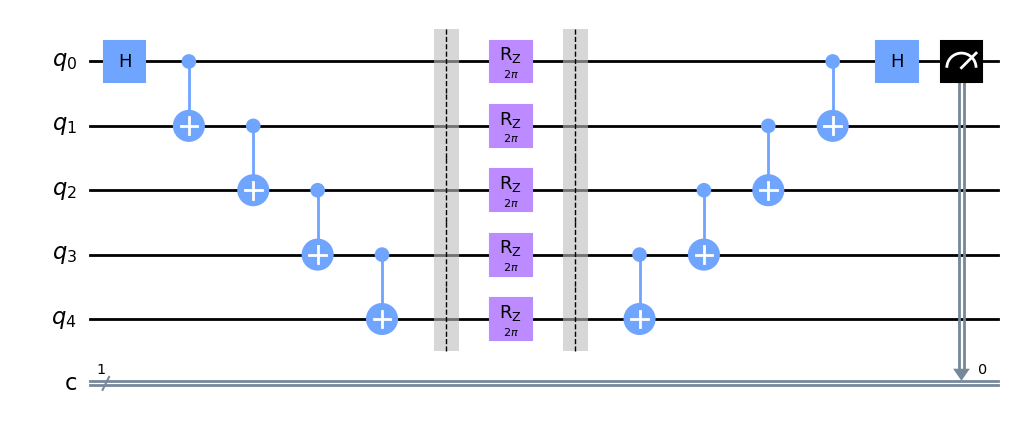

In [70]:
circuits[-1].draw('mpl')

In [71]:
from qiskit import BasicAer, transpile
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(circuits, backend)) #we are running all the circuits contained in circuits list
#transpile(circ,syst) optimizes the circuit for the system

#Transpilation is the process of rewriting a given input circuit to match the topology of a specific quantum device, 
# and/or to optimize the circuit for execution on present day noisy quantum systems.
#Most circuits must undergo a series of transformations that make them compatible with a given target device, 
# and optimize them to reduce the effects of noise on the resulting outcomes.
# Rewriting quantum circuits to match hardware constraints and optimizing for performance can be far from trivial. 
# The flow of logic in the rewriting tool chain need not be linear, and can often have iterative sub-loops, conditional branches, and other complex behaviors.
#https://docs.quantum.ibm.com/api/qiskit/transpiler

counts = job.result().get_counts()

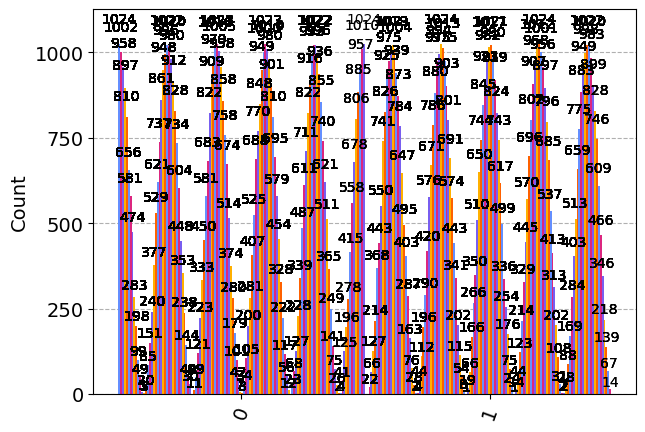

In [72]:
plot_histogram(counts) #this are the counts of measurement of the first qubit of all the elements of circuits list

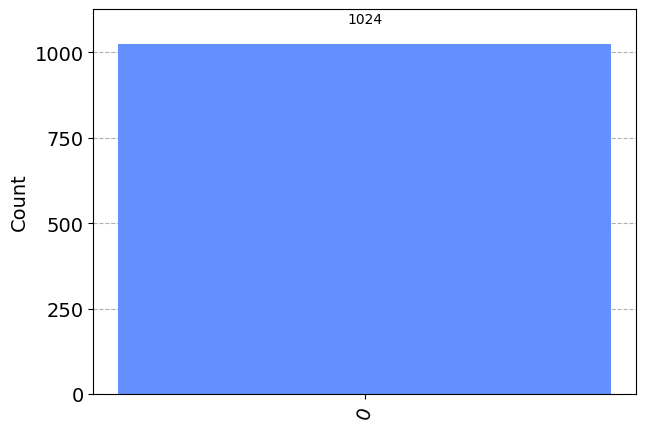

In [73]:
job_zero = backend.run(transpile(circuits[0], backend)) #theta = 0
counts_zero = job_zero.result().get_counts()
plot_histogram(counts_zero)

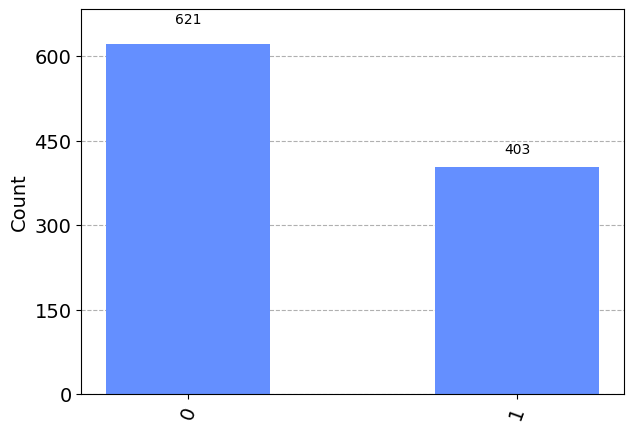

In [74]:
job_20 = backend.run(transpile(circuits[20], backend)) #theta = 0.9894780011306435
counts_20 = job_20.result().get_counts()
plot_histogram(counts_20)

In the example circuit, we apply a global $R_z(\theta)$ rotation on a five-qubit entangled state, and so expect to see oscillation in qubit-0 at $5\theta$.

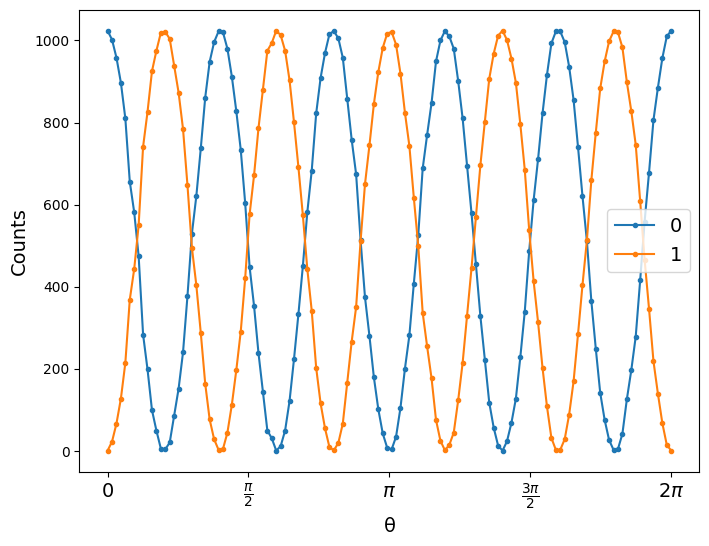

In [75]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111) #to create subplot of the figure fig

#The argument (111) is a shorthand for a subplot grid specification. In this case:

#The first digit represents the number of rows in the grid.
#The second digit represents the number of columns in the grid.
#The third digit represents the index of the subplot.

ax.plot(theta_range, list(map(lambda c: c.get('0', 0), counts)), '.-', label='0')
ax.plot(theta_range, list(map(lambda c: c.get('1', 0), counts)), '.-', label='1') 

#lambda c:c.get('0',0), c is the input of the function, c.get('0',0) returns the value associated to the key '0', the other 0 is the default value
#The use of map() and lambda functions is one way to apply a function to each element of an iterable
#so map(lambda c: c.get('0', 0), counts) returns the number of '0' in each element of counts


ax.set_xticks([i * np.pi / 2 for i in range(5)])
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=14)
ax.set_xlabel('θ', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.legend(fontsize=14)

NB To insert a subcircuit under a different parameterization, the `to_instruction` method accepts an optional argument (`parameter_map`) which, when present, will generate instructions with the source parameter replaced by a new parameter.

In [76]:
p = Parameter('p')
qc = QuantumCircuit(3, name='oracle')
qc.rz(p, 0)
qc.cx(0, 1)
qc.rz(p, 1)
qc.cx(1, 2)
qc.rz(p, 2)

theta = Parameter('theta')
phi = Parameter('phi')
gamma = Parameter('gamma')

qr = QuantumRegister(9)
larger_qc = QuantumCircuit(qr)
larger_qc.append(qc.to_instruction({p: theta}), qr[0:3])
larger_qc.append(qc.to_instruction({p: phi}), qr[3:6])
larger_qc.append(qc.to_instruction({p: gamma}), qr[6:9])

In [77]:
print(larger_qc.draw())

        ┌────────────────┐
q659_0: ┤0               ├
        │                │
q659_1: ┤1 oracle(theta) ├
        │                │
q659_2: ┤2               ├
        └┬──────────────┬┘
q659_3: ─┤0             ├─
         │              │ 
q659_4: ─┤1 oracle(phi) ├─
         │              │ 
q659_5: ─┤2             ├─
        ┌┴──────────────┴┐
q659_6: ┤0               ├
        │                │
q659_7: ┤1 oracle(gamma) ├
        │                │
q659_8: ┤2               ├
        └────────────────┘


In [78]:
print(larger_qc.decompose().draw())

        ┌───────────┐                                    
q659_0: ┤ Rz(theta) ├──■─────────────────────────────────
        └───────────┘┌─┴─┐┌───────────┐                  
q659_1: ─────────────┤ X ├┤ Rz(theta) ├──■───────────────
                     └───┘└───────────┘┌─┴─┐┌───────────┐
q659_2: ───────────────────────────────┤ X ├┤ Rz(theta) ├
         ┌─────────┐                   └───┘└───────────┘
q659_3: ─┤ Rz(phi) ├───■─────────────────────────────────
         └─────────┘ ┌─┴─┐ ┌─────────┐                   
q659_4: ─────────────┤ X ├─┤ Rz(phi) ├───■───────────────
                     └───┘ └─────────┘ ┌─┴─┐ ┌─────────┐ 
q659_5: ───────────────────────────────┤ X ├─┤ Rz(phi) ├─
        ┌───────────┐                  └───┘ └─────────┘ 
q659_6: ┤ Rz(gamma) ├──■─────────────────────────────────
        └───────────┘┌─┴─┐┌───────────┐                  
q659_7: ─────────────┤ X ├┤ Rz(gamma) ├──■───────────────
                     └───┘└───────────┘┌─┴─┐┌───────────┐
q659_8: ──────

### Extra about visualization

In [79]:
# Will execute the circuit on the state vector (sv) simulator
# Returns state vector results, circuit diagram, and Bloch sphere 
from qiskit import Aer, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
def execute_circuit_sv(quantum_circuit):
    #Create a state vector simulator
    statevector_simulator = Aer.get_backend('statevector_simulator')
    #Execute the circuit on the simulator
    result = execute(quantum_circuit, statevector_simulator).result()
    #Assign state vector results
    statevector_results  = result.get_statevector(quantum_circuit)
    #Draw the circuit diagram
    circuit_diagram = quantum_circuit.draw('mpl')
    #Draw the Bloch sphere result
    q_sphere = plot_state_qsphere(statevector_results)
    #Return the results, circuit diagram, and Bloch sphere
    return statevector_results, circuit_diagram, q_sphere

In [80]:
#H-gate 
#Create the single qubit circuit
qc = QuantumCircuit(1)
#Add an H gate to the qubit
qc.h(0)
#Execute the circuit and capture all the results
result, img, qsphere  = execute_circuit_sv(qc)

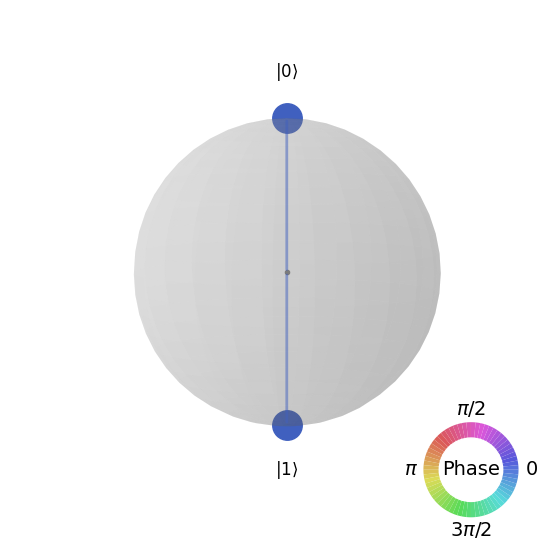

In [81]:
qsphere

In [82]:
#U3-gate
from math import pi
#Create a single qubit circuit
qc = QuantumCircuit(1)
#Add a U3 gate and rotate all parameters by pi/2, and apply it to the qubit
qc.u(pi/2, pi/2, pi/2, 0) #U3(theta, phi, lambda) executes a rotation of theta around x-axis, of phi around z-axis and pf lambda around y-axis
#Execute the circuit and capture all the results
result, img, qsphere = execute_circuit_sv(qc)

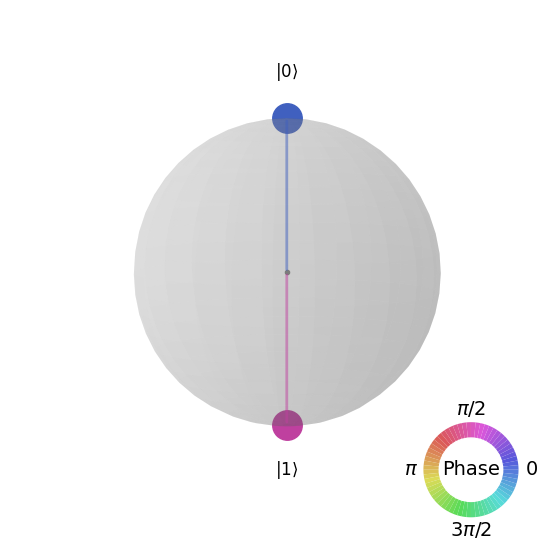

In [83]:
qsphere

*U3 gate*

$$U3(\theta,\phi,\lambda)=\begin{bmatrix}\cos(\frac{\theta}{2}) & -e^{i\lambda}\sin(\frac{\theta}{2}) \\
e^{i\phi}\sin(\frac{\theta}{2}) & e^{i(\phi+\lambda)}\cos(\frac{\theta}{2})\end{bmatrix}
$$

Given $$\ket{\psi}=\alpha\ket{0}+\beta\ket{1} $$
The application of U3 to $\ket{\psi}$ results in
$$U3(\theta,\phi,\lambda)\ket{\psi}=(\alpha\cos\frac{\theta}{2}-\beta e^{i\lambda}\sin\frac{\theta}{2})\ket{0}+(\alpha e^{i\phi}\sin\frac{\theta}{2}+\beta e^{i(\phi+\lambda)}\cos\frac{\theta}{2})\ket{1}

#### Extra Features
https://medium.com/qiskit/learn-how-to-customize-the-appearance-of-your-qiskit-circuits-with-accessibility-in-mind-b9b59fc039f3

## Introduction to IBM Quantum

Offers access to cloud-based quantum computing services

- quantum processors
- simulators
- experiments
- tutorials
- **runtime**

### Using Qiskit to access IBM Quantum services

Qiskit is designed to work with different providers. A _provider_ is any entity that provides quantum-related services that can be accessed using Qiskit. The most common service is quantum processors. `AQT`, `Honeywell`, and `IBM` are example of companies that provide access to their quantum processors through Qiskit.

Since `Runtime` is currently an IBM-only service, this tutorial will focus on using IBM Quantum services.

Before you can access IBM Quantum services, you need an IBM Quantum account. You can sign up for an account at https://quantum-computing.ibm.com/.

Once you have an account, you can grab your API token

<img src="images/token.png">

#### Initializing Your IBM Account in Qiskit

Provides access to the IBM Quantum services available to an account.

Authenticate against IBM Quantum for use from saved credentials or during session.
Credentials can be saved to disk by calling the `save_account()` method::

You can set the default project using the `hub`, `group`, and `project` keywords
    in `save_account()`. Once credentials are saved you can simply instantiate the
    provider like below to load the saved account and default project:

In [ ]:
import qiskit_ibm_provider
# Save you credential on disc
#IBMProvider.save_account("Your token", overwrite= True)

In [ ]:
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider()

You can also enable an account just for the current session by instantiating
    the provider with the API token (more info at https://qiskit.org/ecosystem/ibm-provider/stubs/qiskit_ibm_provider.IBMProvider.html):


In [ ]:
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider(token=<INSERT_IBM_QUANTUM_TOKEN>)

In [ ]:
print(provider.backends())

In [ ]:
# We use IBMQ ibm_brisbane
device_backend = provider.get_backend('ibm_brisbane')

In [ ]:
# Display device configuration.

config = device_backend.configuration()
print("This backend is called {} (version {}) with {} qubit{}. "
      "\nThe basis gates supported on this device are {}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                config.basis_gates))

Ideally, we assume that all the qubits are connected to all the other qubits. However, on the real quantum computers, the physical qubits have limited *Connectivity*, i.e. the ability to interact with other qubits through quantum gates, which can be visualized with *Coupling Map*.

In [ ]:
#from qiskit.visualization import plot_coupling_map
#qubit_coordinates = [[0, 0], [0, 1], [0, 2], [1, 1], [2, 1]]

#plot_coupling_map(config.n_qubits, qubit_coordinates, config.coupling_map)

The physical qubits are described with different features, such as :
- *Gate Error* probabilty of the basis gate on each qubit
- *Decoherence time* for which a qubit takes to lose its quantum information
 - $T_1$, *Relaxation time* : Measures how long the qubit stays in the excited state $|1\rangle$ before it relaxes into the ground state $|0\rangle$.
 - $T_2$, *Dephasing time* : Measures how long a qubit to lose the phase of a qubit stays.
- *Readout error* : Error that occurs in the final classical value during the measurement.

Note that `device_backend.configuration()` gives the static backend setup such as its name, version, number of qubits, while `device_backend.properties` contains the information on the measured and reported backend characteristics, which can be callibrated.

In [ ]:
props = device_backend.properties()

def display_qubit_info(qubit, properties):
    """Print a string describing some of reported properties of the given qubit."""

    # Conversion factors from standard SI units
    us = 1e6
    ns = 1e9

    print("Qubit {0} has a \n"
          "  - T1 time of {1:.2f} microseconds\n"
          "  - T2 time of {2:.2f} microseconds\n"
          "  - U2 gate error of {3:.2e}\n"
          "  - Readout error of {4:.2e} ".format(
              qubit,
              properties.t1(qubit) * us,
              properties.t2(qubit) * us,
              properties.gate_error('sx', qubit),
              properties.readout_error(qubit)))

display_qubit_info(0, props)

#### Running a Circuit on IBM Quantum Backend and Transpiling

The circuit drawing above displays the quantum gates which are mathematically defined in Qiskit. However, on the real quantum devices, the circuits can be only ran with the basis gates with a specific connectivity.  
Qiskit `transpile` function allows to rewrite and optimize the circuit based on the real device constrains.

In [ ]:
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager

In [ ]:
from qiskit.transpiler import CouplingMap, Layout
from qiskit.transpiler.passes import BasicSwap, LookaheadSwap, StochasticSwap

coupling = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6]]

circuit = QuantumCircuit(7)
circuit.h(3)
circuit.cx(0, 6)
circuit.cx(6, 0)
circuit.cx(0, 1)
circuit.cx(3, 1)
circuit.cx(3, 0)

coupling_map = CouplingMap(couplinglist=coupling)

bs = BasicSwap(coupling_map=coupling_map)
pass_manager = PassManager(bs)
basic_circ = pass_manager.run(circuit)

ls = LookaheadSwap(coupling_map=coupling_map)
pass_manager = PassManager(ls)
lookahead_circ = pass_manager.run(circuit)

ss = StochasticSwap(coupling_map=coupling_map)
pass_manager = PassManager(ss)
stochastic_circ = pass_manager.run(circuit)

In [ ]:
circuit.draw(output='mpl')

In [ ]:
lookahead_circ.draw(output='mpl')

In [ ]:
import math
from qiskit.providers.fake_provider import FakeTokyo

backend = FakeTokyo()  

In [ ]:
optimized_0 = transpile(circuit, backend=backend, seed_transpiler=11, optimization_level=0)

In [ ]:
optimized_0.draw('mpl')

In [ ]:
qc = random_circuit(3,2)
qc.measure_all()

In [ ]:
# Select a backend to run the circuit
backend = provider.get_backend('ibmq_qasm_simulator')

result = backend.run(transpile(qc, backend), shots=1000).result()
counts  = result.get_counts(qc)
print(counts)

In [ ]:
# Plot the result
plot_histogram(counts, color='green', title="New Histogram")

### Hands-on part

#### Try yourself

The goal is to reach the state $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$. 

<div><img src="images/minus.png" width="200"></div>

In [ ]:
## Insert your code here
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram



### Solution

In [ ]:
#INSERT CODE HERE

## Some exercises on Bell states

Construct the Bell state $|\Psi^+\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle\right)$.

In [ ]:
## CHECK THE RESULT
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex
display(array_to_latex(Statevector.from_instruction(qc), prefix="\\text{Statevector} = "))

### Solution

In [ ]:
qc = QuantumCircuit(2,2) # this time, we not only want two qubits, but also two classical bits for the measurement
#INSERT CODE HERE

Construct the other Bell states:

- $|\Psi^-\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle - |10\rangle\right)$ 
- $|\Phi^+\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$
- $|\Phi^+\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle - |11\rangle\right)$ 

Write a function that builds a quantum circuit on 3 qubits and creates the GHZ-like state, $|\Psi\rangle = \frac{1}{\sqrt{2}} \left(|010\rangle - |101 \rangle \right)$.

Hint: start from the circuit that constructs the GHZ state, $|GHZ\rangle = \frac{1}{\sqrt{2}} \left(|000\rangle + |111 \rangle \right)$:

In [ ]:
## WRITE YOUR CODE HERE:
#
#
#
#


backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
counts

## Exercise

Consider the following quantum circuit
<img src="images/inverse.png" width="500" height="340">

- Calculate the matrix of the unitary operation U corresponding to C, with respect to the computational basis.
- Write down a quantum circuit corresponding to the inverse operation $U^{-1}$
- If C is applied to the initial state $|0⟩|0⟩$ and is followed by a measurement of each qubit in the computational basis, what is the distribution on measurement outcomes?

### Solution

In [ ]:
## WRITE YOUR CODE/calculation HERE:
#
#
#
#

In [ ]:
# inverse circuit


#BONUS VISUALIZATION
gate_colours = {
    "displaycolor": {
        "x": [ # gate name
            "#da1e28", # box color (red)
            "#FFFFFF" # box text color (white)
        ],
        "h": [ # gate name
            "#da1e28", # box color (red)
            "#FFFFFF" # box text color (white)
        ],
        "cx": [ # gate name
            "#da1e28", # box color (red)
            "#FFFFFF" # box text color (white)
        ],
        "ry": [ # gate name
            "#da1e28", # box color (red)
            "#FFFFFF" # box text color (white)
        ],
    },
}

display(qci.draw('mpl',style=gate_colours)) 



## Overview of Quantum States

State-vector notation  is convenient when dealing with states that can always be expressed as a linear combination of basis states, each with an associated probability amplitude. The definition of the state of our qubits cannot always be written down as linear combinations in a given basis, sometimes it must be expressed in terms of ensembles (statistical mixtures) of multiple states (noise), each with an associated probability of occurrence. The adopted formulation is the `density matrix`. 
In the following we will review this formulation for ***pure state***, **mixed state** and we introduce the concept of **state purity** and ***partial trace***.

#### Pure State
Pure states are those for which we can precisely define their quantum state at every point in time and the measurement outcome will be probabilistic with no uncertainty on what this quantum state will be.
For example, if we initialize the single qubit $|q \rangle $ in state $ | 0 \rangle $, and apply a Hadamard gate, we know our final state will be:

$$ 
| q \rangle = \frac{1}{\sqrt{2}} \left( | 0 \rangle  + | 1 \rangle  \right) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = | + \rangle 
$$
In general, we know that in the conventional state vector notation, an $n$-qubit pure state can be expressed as:

$$ | \psi \rangle = \begin{bmatrix} \alpha_0 \\ \alpha_1 \\ \vdots \\ \alpha_{N-1} \end{bmatrix}, $$

where $ N = 2^{n} $. An alternative way to express this pure quantum state is in the form of a matrix. This can be done by using the density operator representation, which is defined as:

$$ \rho \equiv  | \psi \rangle \langle \psi | $$

Here, the term $| \psi \rangle \langle \psi | $ represents the [outer product](../ch-gates/proving-universality.ipynb#outer) of the state $ \psi $ with itself:


$$ 
\begin{aligned}
& \rho = \begin{bmatrix} \alpha_0 \\ \alpha_1 \\ \vdots \\ \alpha_N \end{bmatrix} \begin{bmatrix} \alpha_0^* & \alpha_1^* & \dots & \alpha_N^* \end{bmatrix} 
\\
\\
& \rho = \begin{bmatrix} |\alpha_0|^2 & \alpha_0 \alpha_1^* & \dots & \alpha_0 \alpha_N^* \\ \alpha_1 \alpha_0^* & |\alpha_1|^2 & \dots & \alpha_1 \alpha_N^* \\ \vdots & \vdots & \ddots & \vdots \\ \alpha_N \alpha_0^* & \alpha_N \alpha_1^* & \dots & |\alpha_N|^2 \end{bmatrix}
\end{aligned}
$$


Let's consider, for example, the following two-qubit, maximally-entangled pure state:

$$ | \psi_{AB} \rangle = \frac{1}{\sqrt{2}} \left ( | 0 0 \rangle + | 1 1 \rangle \right ) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 1 \end{bmatrix} 
$$


The density matrix representation for this state is then given by:

$$ 
\begin{aligned}
& \rho_{AB}  = | \psi_{AB} \rangle \langle \psi_{AB} |
\\
\\
& \rho_{AB} = \left ( \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 1 \end{bmatrix} \right ) \left ( \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 0 & 0 & 1 \end{bmatrix} \right )
\\
\\
& \rho_{AB} = \frac{1}{2} \begin{bmatrix} 1 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 1 & 0 & 0 & 1 \\ \end{bmatrix}
\end{aligned}
$$


In Qiskit, we can use the ``quantum_info`` module to represent quantum states either in state vector notation, or in the density matrix representation. For convenience, we will import this module as ``qi``:

In [ ]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi

Let's once again consider the entangled pure state $| \psi_{AB} \rangle $. We can prepare this state by applying a Hadamard gate to the first qubit, and an CNOT between the first and second qubits:

In [ ]:
qc_AB = QuantumCircuit(2)
qc_AB.h(0)
qc_AB.cx(0,1)
qc_AB.draw('mpl')

To obtain the state constructed by our ``QuantumCircuit`` in state vector notation, we can make use of the ``Statevector.from_instruction()`` class method from the ``quantum_info`` module as follows:

In [ ]:
psi_AB = qi.Statevector.from_instruction(qc_AB)
psi_AB.draw('latex', prefix='|\\psi_{AB}\\rangle = ')

Similarly, we can use the ``DensityMatrix.from_instruction()`` class method to obtain density matrix representation for this same state:

In [ ]:
rho_AB = qi.DensityMatrix.from_instruction(qc_AB)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

As expected, the result matches our calculation. We can also visualize the density matrix using a cityscape plot of the state:

In [ ]:
from qiskit.visualization import plot_state_city
plot_state_city(rho_AB.data, title='Density Matrix')

### 1. Exercises  <a id="ex1"></a>
Find the corresponding density matrix for the following pure states. Use Qiskit to prepare the states, and verify your results using the ``quantum_info`` module:
   
1.	$ \frac{1}{2}\left ( |0 0 \rangle + |0 1 \rangle + |1 0 \rangle + |1 1 \rangle \right ) $       



Now, all we have done so far is show a different way to represent quantum states, but there is no apparent advantage in doing so. To understand why the density matrix representation is beneficial, we need to learn about the concept of mixed states.

## 2. Mixed States <a id="mixed"></a>

Mixed states are those that consist of statistical ensembles of different quantum states.

Consider, once again, the two-qubit entangled state:

$$ | \psi_{AB} \rangle = \frac{1}{\sqrt{2}} \left ( | 0_A 0_B \rangle + | 1_A 1_B \rangle \right ) $$

Here we have explicitly used the subscripts $A$ and $B$ to label the qubits associated with registers $q_1$ and $q_0$, respectively. Now, let's assume that right after preparing our state $| \psi_{AB} \rangle $ we perform a measurement on register $q_1$.


We know that after a measurement, $\psi_B$ will be in state $| 0_B \rangle $ with probability $1/2$, or in state $| 1_B \rangle $ with probability $1/2$; however, $\psi_B$ is **not** in a linear superposition of $| 0_B \rangle $ and $| 1_B \rangle $. In other words, $\psi_B$ **cannot** be expressed as a state vector of the form $1/\sqrt{2} \left (|0_B \rangle + | 1_B \rangle \right)$. Instead, we have to use a different notation to write down that $\psi_B$ is rather an ensemble (not a quantum superposition) of the states $| 0_B \rangle $ and $| 1_B \rangle $, and whose outcome depends on what we measure on register $q_1$. 

We then call $\psi_B$ a mixed state, which can be represented as an ensemble of states:

$$
\left \{| \psi_{B_0} \rangle , | \psi_{B_1} \rangle \right \} = \left \{ | 0_B \rangle , | 1_B \rangle \right \},
$$ 

each with an associated probability of occurrence:

$$ \left \{ p_0, p_1 \right \} = \left \{ 1/2, 1/2 \right \} $$

Although this way of expressing $\psi_B$ (or any general mixed state) is perfectly valid, it turns out to be somewhat inconvenient. Since a mixed state can consist of a myriad of pure states, it can be difficult to track how the whole ensemble evolves when, for example, gates are applied to it. It is here that we turn to the density matrix representation.

A mixed state, consisting of several possible outcome pure states $|\psi_j \rangle$ , each with probability of occurrence $p_j$, is defined as a density matrix of the form:

$$ \rho \equiv \sum_{j} p_j |\psi_j \rangle \langle \psi_j | $$

It is easy to see that this general definition of the density matrix also holds for pure states, for which we will only have one $ |\psi_j \rangle $ term with $p_j = 1$.

### State Purity <a id="trace_sqr"></a>

A very useful property of the density matrix is that when taking the trace $\text{Tr}$ of its square $\rho^{2}$, we obtain a scalar value $\gamma$ that is good measure of the purity of the state the matrix represents. For normalized states, this value is always less than or equal to 1, with the equality occurring for the case of a pure state:

$$ \gamma \equiv \text{Tr}(\rho^{2}) \leq 1 $$

$$ \gamma \equiv \text{Tr}(\rho^{2}) = 1 \; \text{if pure} $$

In Qiskit, we can easily extract the purity of a density matrix by using the `purity()` class method. For example, for the pure state $| + \rangle$, we should expect to see a purity of 1:

In [ ]:
import numpy as np
rho_p = qi.DensityMatrix.from_label('+')
display(rho_p.draw('latex', prefix='\\rho_p = '))
gamma_p = rho_p.purity()
print("State purity: ", np.round(np.real(gamma_p),3))

And, for a mixed state, like $\rho_m = \frac{1}{2} | 0 \rangle \langle 0 | + \frac{1}{2} | 1 \rangle \langle 1 | $, we expect a purity of less than 1:

In [ ]:
rho_m = 1/2*(qi.DensityMatrix.from_label('0') + qi.DensityMatrix.from_label('1'))
display(rho_m.draw('latex', prefix='\\rho_m = '))
gamma_m = rho_m.purity()
print("State purity: ", np.round(np.real(gamma_m),3))

***NB*** One of the drawbacks of representing the density matrices in terms of ensembles of basis states, is that their outcome is not unique. Understanding that the same density matrix can represent many different ensembles of quantum states is important to avoid drawing conclusions about a particular system simply based on its density matrix representation alone. 

### The Reduced Density Matrix
When working with the density matrix notation on composite systems, we can extract the state of each subsystem, even if they are entangled. This is done in the form of what is known as the reduced density matrix.

Consider a quantum system composed of subsystems $A$ and $B$, and fully described by the density matrix $\rho_{AB}$. The reduced density matrix of subsystem $A$ is then given by:

$$ \rho_{A} = \text{Tr}_B(\rho_{AB}), $$


Here, $\text{Tr}_B$ is an operation known as the partial trace, which is defined as: 

$$
\text{Tr}_B \left (| \xi_u \rangle \langle \xi_v | \otimes | \chi_u \rangle \langle \chi_v | \right ) \equiv | \xi_u \rangle \langle \xi_v | \text{ Tr} \left ( | \chi_u \rangle \langle \chi_v | \right )
$$

$| \xi_u \rangle $ and $| \xi_v \rangle $ are arbitrary states in the subspace of $A$, and $| \chi_u \rangle $ and $| \chi_v \rangle $ arbitrary states in the subspace of $B$. $\text{Tr}$ is the standard trace operation, which for two arbitrary states $\text{Tr} \left ( | \chi_u \rangle \langle \chi_v | \right ) = \langle \chi_v |\chi_u \rangle $. Similarly, we can calculate the reduced density matrix of subsystem $B$ using the partial trace over $A$.

As an example, let's reconsider the pure entangled state:

$$ | \psi_{AB} \rangle = \frac{1}{\sqrt{2}} \left ( | 0_A 0_B \rangle + | 1_A 1_B \rangle \right ) $$




This system is then composed of single-qubit subsystem $A$ with basis vectors $ \left \{ |\xi_1 \rangle, |\xi_2 \rangle \right \} = \{ | 0_A \rangle, | 1_A \rangle \}$, and single-qubit subsystem $B$ with basis vectors $ \left \{ |\chi_1 \rangle, |\chi_2 \rangle \right \} = \{ | 0_B \rangle, | 1_B \rangle \}$. We know that this system is not separable (i.e., $| \chi_{AB} \rangle \neq |\chi_{A}\rangle \otimes |\chi_{B}\rangle$); however, by using the reduced density matrix, we can find a full description for subsystems $A$ and $B$ as follows.

The density matrix of our state $| \psi_{AB} \rangle$ can be expressed in terms of outer products of the basis vectors as:

$$
\rho_{AB} = | \psi_{AB} \rangle \langle \psi_{AB} | =  \frac{1}{2} \left [ | 0_A 0_B \rangle \langle 0_A 0_B | + | 0_A 0_B \rangle \langle 1_A 1_B | + | 1_A 1_B \rangle \langle 0_A 0_B | + | 1_A 1_B \rangle \langle 1_A 1_B | \right ]
$$


Now, to calculate the reduced density matrix for, let's say, subsystem $B$, we have:

$$
\begin{aligned}
\rho_{B} & = \text{Tr}_A(\rho_{AB})
\\
\\
& = \frac{1}{2}\left [ \text{Tr}_A(| 0_A 0_B \rangle \langle 0_A 0_B |) + \text{Tr}_A(| 0_A 0_B \rangle \langle 1_A 1_B |) + \text{Tr}_A(| 1_A 1_B \rangle \langle 0_A 0_B |) + \text{Tr}_A(| 1_A 1_B \rangle \langle 1_A 1_B |) \right ]
\\
\\
& = \frac{1}{2}\left [ \text{Tr}(| 0_A \rangle \langle 0_A |)| 0_B \rangle \langle 0_B | + \text{Tr}(| 0_A \rangle \langle 1_A |)| 0_B \rangle \langle 1_B | + \text{Tr}(| 1_A \rangle \langle 0_A |) | 1_B \rangle \langle 0_B | + \text{Tr}(| 1_A \rangle \langle 1_A |) | 1_B \rangle \langle 1_B | \right ]
\\
\\
& = \frac{1}{2}\left [ \langle 0_A | 0_A \rangle | 0_B \rangle \langle 0_B | + \langle 1_A | 0_A \rangle | 0_B \rangle \langle 1_B | + \langle 0_A | 1_A \rangle | 1_B \rangle \langle 0_B | + \langle 1_A | 1_A \rangle | 1_B \rangle \langle 1_B | \right ]
\\
\\
& = \frac{1}{2}\left [ | 0_B \rangle \langle 0_B | + | 1_B \rangle \langle 1_B | \right ]
\\
\\
&= \frac{1}{2} \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} 
\end{aligned}
$$



At first glance, this result might seem rather strange. We started with the pure entangled state $|\psi_{AB} \rangle $, and  calculated that the state of one of its parts (subsystem $B$) is the mixed state $\rho_{B}$. However, going back to the first example given above, we see that the result from calculating the reduced density matrix for $B$ is equivalent to the representation we obtained for $\psi_B$, when measurements were taken over qubit $A$. We can then conclude that the reduced density matrix $\rho_{B}$ is a way to describe the statistical outcomes of subsystem $B$, when the measurement outcomes of subsystem $A$ are averaged out. This is in fact what ”tracing out” subsystem $A$ means.

It is worth mentioning that so far we have described the concept of partial trace for a bipartite (two-part) system, but this can be generalized for multi-part systems.

In Qiskit, we can easily obtain the reduced density matrix of a system by using the ``partial_trace()`` function and passing the density matrix of the composite system, and a list with the subsystems to trace over:



In [ ]:
rho_B = qi.partial_trace(rho_AB,[0])
rho_A = qi.partial_trace(rho_AB,[1])

display(rho_B.draw('latex', prefix=" \\rho_{B} = "),
        rho_A.draw('latex', prefix=" \\rho_{A} = "))

### Exercises  <a id="ex4"></a>
Calculate the reduced density matrices for following:

The mixed state: $ \rho_{mr} = \frac{1}{4} | \Phi^+ \rangle \langle \Phi^+ | + \frac{3}{4} | \Phi^- \rangle \langle \Phi^- |$, where $| \Phi^+ \rangle$ and $| \Phi^- \rangle$ are the Bell states:

$| \Phi^+ \rangle = \frac{1}{\sqrt{2}} \left( |00 \rangle + |11 \rangle \right ) $

$| \Phi^- \rangle = \frac{1}{\sqrt{2}} \left( |00 \rangle - |11 \rangle \right ) $
    
    
    and for the following quantum circuit

In [ ]:
qc_CD = QuantumCircuit(2)
qc_CD.ry(np.pi/3,0)
qc_CD.h(1)
qc_CD.cx(0,1)
qc_CD.cx(1,0)
qc_CD.draw("mpl", style="iqx")

### Phase Kickback

<img src="images/phase_kickback.png" width="240" height="240" align="center"/>

1- Implement the circuit and visualize it to make sure it is correct.

2 - Obtain the final state using the state vector simulator and
visualize the state of the individual qubits on the Bloch sphere.
Which state did you obtain?

3 - Add an additional `CNOT` gate to the circuit.

4 - Execute it again the state vector simulator and the state of the
individual qubits on the Bloch sphere. What do you observe?


#### Optional tasks:
1 - Replace the CNOT gate in the circuit above with a controlled
Rx rotation.

2 - Simulate the circuit for various angles of the rotation gate and
visualize the results on the Bloch sphere. What do you
observe? Can you explain the effect?


These two circuits are special cases of **phase kickback**.

Phase kickback is a fundamental building block of many quantum algorithms.
General form is:

<img src="images/phase_kickback2.png" width="340" height="340" align="center"/>

Choosing $|u\rangle$ as an eigenstate of $U$ with eigenvalue $\exp(i\phi)$ we have:

- $|0\rangle \otimes |U\rangle \to H \to \frac{1}{\sqrt{2}}( |0\rangle + |1\rangle) \otimes |u\rangle $ 
- $\frac{1}{\sqrt{2}}( |0\rangle + |1\rangle) \otimes |u\rangle  \to cU \to \frac{1}{\sqrt{2}}( |0\rangle \otimes |u\rangle+ \exp(i\phi)|1\rangle\otimes |u\rangle) $

$\longrightarrow$ Phase has been kicked back into the control qubit

- $\frac{1}{\sqrt{2}}( |0\rangle \otimes |u\rangle+ \exp(i\phi)|1\rangle\otimes |u\rangle) \to H \to (\cos\frac{\phi}{\sqrt{2}}|0\rangle)+ i\sin\frac{\phi}{\sqrt{2}}|1\rangle)\otimes |u\rangle$


Further reading on https://qiskit.org/textbook/ch-gates/phase-kickback.html

## HOMEWORK

### 1. Explaining the CNOT Circuit Identity <a id="explaining-identity"></a>
Let's lool at this identity:

![cnot_identity](images/identities_1.svg)

This is an example of _kickback_ (or, _phase kickback_ ) which is very important and is used in almost every quantum algorithm. Kickback is where the eigenvalue added by a gate to a qubit is ‘kicked back’ into a different qubit via a controlled operation. This identity is very useful in hardware, since some hardwares only allow for CNOTs in one direction between two specific qubits. We can use this identity to overcome this problem and allow CNOTs in both directions.

For example, we saw that performing an X-gate on a $|{-}\rangle$ qubit gives it the phase $-1$:
$$
X|{-}\rangle = -|{-}\rangle
$$

When our control qubit is in either $|0\rangle$ or $|1\rangle$, this phase affects the whole state, however it is a global phase and has no observable effects:

$$
\begin{aligned}
\text{CNOT}|{-}0\rangle & = |{-}\rangle \otimes |0\rangle \\
                        & = |{-}0\rangle \\
                        \quad & \\
\text{CNOT}|{-}1\rangle & = X|{-}\rangle \otimes |1\rangle \\
                        & = -|{-}\rangle \otimes |1\rangle \\
                        & = -|{-}1\rangle \\
\end{aligned}
$$

The interesting effect is when our control qubit is in superposition...

#### Try to complete this initial proof.

## 2. Entanglement Tests


- Create the following circuit (add swap gates in the end to have the usual order of the qubits in read out)
<center><img src="images/circuito_esonero.png" width="500"/></center>
<center>Circuit proposed in the first internal test.</center>

In [ ]:
from qiskit import *
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import partial_trace, entropy

import numpy as np
import math

In [ ]:
nQubits = # <--- insert your code here
nClassicBits = 4

circuit.draw(output='mpl')

#### Calculate the overall output state

The order of the 4-qubits state follows the decimal notation:

<center><img src="images/Decimal_notation1.jpeg" width="700"/></center>

In the case of 4 qubits we then have the states ordered as follow:

<center><img src="images/Decimal_notation2.jpeg" width="800"/> </center

In [ ]:
# Run the quantum circuit on a statevector simulator backend
backend = # <--- insert your code here

outputstate = # <--- insert your code here
print(outputstate)

Now print the amplitudes and compare them with the calculated output state:
<center><img src="images/psi_out.jpeg" width="600"/></center>

In [ ]:
list_check = [5,7,8,10]
for ind in list_check:
    print(outputstate[ind])

#### Plot the final state using the Bloch and the Q-sphere 

#### Is AB entangled with CD? 
Calculate the reduced density matrix $\rho_{CD}$ anche check if the `Von Neumann entropy` is equal or greater than zero.

We can do this using the previous result of the output state and the Qiskit's **partial_trace(state, list_qubits_to_be_traced_out)** module, that let us calculate reduced matrices.

We can also use the Qiskit's `entropy(rho_matrix)` module to calculate the Von Neumann entropy. See https://github.com/Qiskit/qiskit-terra/blob/main/qiskit/quantum_info/states/measures.py for more details.

In [ ]:
def check_vn_entropy(vn_entropy):
    if vn_entropy != 0.:
        print("The state is a mixed state")

In [ ]:
## insert your code here -->
check_vn_entropy(my_entropy)